In [ ]:
import tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
601,602,0,3,"Slabenoff, Mr. Petco",male,NaN,0,0,349214,7.8958,NaN,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [ ]:
corr = train.corr()
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [ ]:
def get_title(name):
  if "." in name:
    return name.split(".")[0].split(",")[1].strip()
  else:
    return "No Title"

def categorize_title(title):
    if title in ["Capt", "Col", "Major"]:
        return "Officer"
    elif title in ["Jonkheer", "Don", "the Countess", "Dona", "Lady", "Sir"]:
        return "Royalty"
    elif title in ["Mme", "Lady"]:
        return "Mrs"
    elif title in ["Mlle", "Ms"]:
        return "Miss"
    else:
        return title

print(train.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median']).round(1))
for _ in range(len(train.groupby(["Sex", "Pclass"]))):
  a = train.groupby(["Sex", "Pclass"])["Age"].median()[_]
  
  

               mean  median
Sex    Pclass              
female 1       34.6    35.0
       2       28.7    28.0
       3       21.8    21.5
male   1       41.3    40.0
       2       30.7    30.0
       3       26.5    25.0


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train["Title"]=train["Name"].map(lambda x: get_title(x))
train["Title"]=train["Title"].map(lambda n: categorize_title(n))
train["Embarked"].replace(("S", "C", "Q"), (0,1,2), inplace=True)
train["Sex"].replace(("female", "male"), (0, 1), inplace=True)
train.drop("PassengerId", axis=1, inplace=True)
train.drop("Ticket", axis=1, inplace=True)
train["Age"].fillna(train["Age"].median(), inplace=True)
train["Embarked"].fillna(train["Embarked"].median(), inplace=True)
train["Title"].replace(("Mr", "Mrs", "Royalty", "Master", "Dr","Miss", "Rev", "Officer"), (0,1,2,3,4,5,6,7), inplace=True)
train["Family"] = train["Parch"] + train["SibSp"]

In [ ]:
train.drop("Name", axis=1, inplace=True)
train.drop("Cabin", axis=1, inplace=True)
train.drop("Parch", axis=1, inplace=True)
train.drop("SibSp", axis=1, inplace=True)

In [ ]:
train.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
445,1,1,1,4.0,81.8583,0.0,3,2
235,0,3,0,28.0,7.5500,0.0,5,0
525,0,3,1,40.5,7.7500,2.0,0,0
878,0,3,1,28.0,7.8958,0.0,0,0
532,0,3,1,17.0,7.2292,1.0,0,2
350,0,3,1,23.0,9.2250,0.0,0,0
148,0,2,1,36.5,26.0000,0.0,0,2
648,0,3,1,28.0,7.5500,0.0,0,0
507,1,1,1,28.0,26.5500,0.0,0,0
561,0,3,1,40.0,7.8958,0.0,0,0


In [ ]:
test = pd.read_csv("test.csv")
id = test["PassengerId"]
test["Title"]=test["Name"].map(lambda x: get_title(x))
test["Title"]=test["Title"].map(lambda n: categorize_title(n))
test["Embarked"].replace(("S", "C", "Q"), (0,1,2), inplace=True)
test["Sex"].replace(("female", "male"), (0, 1), inplace=True)
test.drop("PassengerId", axis=1, inplace=True)
test.drop("Ticket", axis=1, inplace=True)
test["Age"] = test.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))
test["Embarked"].fillna(test["Embarked"].median(), inplace=True)
test["Title"].replace(("Mr", "Mrs", "Royalty", "Master", "Dr","Miss", "Rev", "Officer"), (0,1,2,3,4,5,6,7), inplace=True)
test["Family"] = test["Parch"] + test["SibSp"]
test.drop("Name", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)
test.drop("Parch", axis=1, inplace=True)
test.drop("SibSp", axis=1, inplace=True)

In [ ]:
y = train["Survived"]
x = train.drop("Survived", axis=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation

model = Sequential()
model.add(Dense(32, input_shape=(7,))) # 32 nodes in hidden layer, 8 inputs
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.5))
model.add(Dense(1, activation="sigmoid"))

Epoch 1/200
23/23 [==============================] - 0s 10ms/step - loss: 0.6627 - accuracy: 0.6124 - val_loss: 0.5534 - val_accuracy: 0.6983
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 0.6125 - accuracy: 0.6910 - val_loss: 0.5557 - val_accuracy: 0.7151
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.7121 - val_loss: 0.5970 - val_accuracy: 0.7151
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.7331 - val_loss: 0.5248 - val_accuracy: 0.7486
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5322 - accuracy: 0.7500 - val_loss: 0.5308 - val_accuracy: 0.7374
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5528 - accuracy: 0.7261 - val_loss: 0.5346 - val_accuracy: 0.7263
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5468 - accuracy: 0.7303 - val_loss: 0.5161 - val_accuracy: 0.7151
Epoch 8/200


Text(0.5, 1.0, 'Training Model')

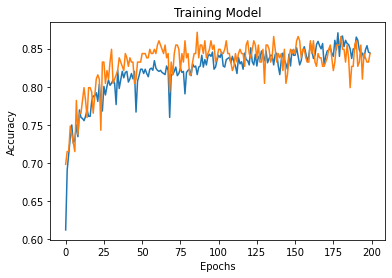

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_train = model.fit(x, y, epochs=200, batch_size=32, validation_split=.2)
model.save("Titanic.h5")
import matplotlib.pyplot as plt

plt.plot(model_train.history['accuracy'], label='train')
plt.plot(model_train.history["val_accuracy"], label='validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Model")

In [ ]:
print(test.isnull().sum())

Pclass      0
Sex         0
Age         0
Fare        1
Embarked    0
Title       0
Family      0
dtype: int64


In [ ]:
test["Fare"].fillna(test["Fare"].mean(), inplace=True)

In [ ]:
import numpy as np

predictions = model.predict(test)
pred = []
for p in predictions:
  pred.append(round(p[0]))

output = pd.DataFrame({"PassengerId": id, "Survived": pred})
output.to_csv("Titanic.csv", index=False)

In [ ]:
from google.colab import files 
files.download("Titanic.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>